In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Clean prediction data

### Drop irrelevant data and rename columns

In [40]:
pred = pd.read_csv('../week_03/data/projection_prefecture.csv', header=[1])
pred

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,総数,0～4歳,5～9歳,10～14歳,15～19歳,...,45～49歳.2,50～54歳.2,55～59歳.2,60～64歳.2,65～69歳.2,70～74歳.2,75～79歳.2,80～84歳.2,85～89歳.2,90歳以上.2
0,1000,a,北海道,NaN,2015年,5381733,186275,202560,220346,239838,...,182155,180830,179163,217945,242222,191685,169245,143464,98981,65661
1,1000,a,北海道,NaN,2020年,5216615,171236,187241,203081,217852,...,197176,181353,179128,176618,213099,233802,181174,152816,117180,89016
2,1000,a,北海道,NaN,2025年,5016554,150977,172531,188169,200850,...,169721,196455,180071,177202,173146,206125,222379,165270,127014,113032
3,1000,a,北海道,NaN,2030年,4791592,139491,152274,173542,186685,...,145317,169281,195237,178565,174024,167963,196489,204906,139441,132313
4,1000,a,北海道,NaN,2035年,4546357,129292,140762,153328,172366,...,123382,145090,168342,193780,175738,169135,160816,181403,175799,152439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,47382,3,沖縄県,与那国町,2025年,1824,49,52,57,13,...,31,34,39,42,44,60,34,15,17,14
12995,47382,3,沖縄県,与那国町,2030年,1718,45,45,45,13,...,31,31,34,38,40,41,51,28,9,14
12996,47382,3,沖縄県,与那国町,2035年,1621,41,41,39,10,...,30,31,31,32,36,37,34,43,18,10
12997,47382,3,沖縄県,与那国町,2040年,1524,37,38,36,9,...,19,30,31,30,31,33,31,29,28,13


In [41]:
pred = pred[pred['Unnamed: 1']=='a']
pred.drop(['Unnamed: 1', 'Unnamed: 3'], axis=1, inplace=True)

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_36379/2553021737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.drop(['Unnamed: 1', 'Unnamed: 3'], axis=1, inplace=True)


In [42]:
cols = list(pred.columns)
newcols = []
for col in cols:
    if col == 'Unnamed: 0':
        newcols.append('code')
    elif col == 'Unnamed: 2':
        newcols.append('Prefecture')
    elif col == 'Unnamed: 4':
        newcols.append('Year')
    else:
        c = col
        c = c.replace('.1', '_men')
        c = c.replace('.2', '_women')
        c = c.replace('総数', 'agetotal')
        c = c.replace('～', '-')
        c = c.replace('歳', '')
        c = c.replace('以上', 'above')
        newcols.append(c)
pred.columns = newcols
pred.columns

Index(['code', 'Prefecture', 'Year', 'agetotal', '0-4', '5-9', '10-14',
       '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
       '90above', 'agetotal_men', '0-4_men', '5-9_men', '10-14_men',
       '15-19_men', '20-24_men', '25-29_men', '30-34_men', '35-39_men',
       '40-44_men', '45-49_men', '50-54_men', '55-59_men', '60-64_men',
       '65-69_men', '70-74_men', '75-79_men', '80-84_men', '85-89_men',
       '90above_men', 'agetotal_women', '0-4_women', '5-9_women',
       '10-14_women', '15-19_women', '20-24_women', '25-29_women',
       '30-34_women', '35-39_women', '40-44_women', '45-49_women',
       '50-54_women', '55-59_women', '60-64_women', '65-69_women',
       '70-74_women', '75-79_women', '80-84_women', '85-89_women',
       '90above_women'],
      dtype='object')

In [43]:
pred['Year'] = pred['Year'].str.replace('年', '')

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_36379/2496312231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['Year'] = pred['Year'].str.replace('年', '')


In [44]:
pred['code'] = pred['code'].astype(str).str.slice(0, -3)

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_36379/3468651731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['code'] = pred['code'].astype(str).str.slice(0, -3)


### Translation to English

In [45]:
translate = pd.read_csv('../week_03/collected/translate.csv')
translate

,Japanese,English
0,北海道,Hokkaido
1,青森県,Aomori
2,岩手県,Iwate
3,宮城県,Miyagi
4,秋田県,Akita
5,山形県,Yamagata
6,福島県,Fukushima
7,茨城県,Ibaraki
8,栃木県,Tochigi
9,群馬県,Gunma


In [46]:
pred = pred.merge(translate, how='inner', left_on='Prefecture', right_on='Japanese')
pred.drop(['Japanese', 'Prefecture'], axis=1, inplace=True)

In [47]:
pred = pred.loc[:,['code', 'English'] + list(pred.columns)[1:-1]]

In [48]:
pred.rename(columns={'English':'Prefecture'}, inplace=True)

### Data aggregation

In [49]:
pred_r = pred[['code', 'Prefecture', 'Year', 'agetotal', 'agetotal_men', 'agetotal_women']]
pred_r.rename({'agetotal':'agetotal_all'}, inplace=True)
for s in ['', '_men', '_women']:
    for n1, n2 in [('','1'), ('2','3'), ('4','5'), ('6','7')]:
        df = pred.loc[:, [f'{n1}0-{n1}4{s}', f'{n1}5-{n1}9{s}', f'{n2}0-{n2}4{s}',f'{n2}5-{n2}9{s}']].sum(axis=1)
        if s == '':
            df.name = f'{n1}0-{n2}9_all'
        else:
            df.name = f'{n1}0-{n2}9{s}'
        pred_r = pd.concat([pred_r, df],axis=1)
    df = pred.loc[:, [f'80-84{s}', f'85-89{s}', f'90above']].sum(axis=1)
    if s == '':
        df.name = f'80-_all'
    else:
        df.name = f'80-{s}'
    pred_r = pd.concat([pred_r, df],axis=1)

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_36379/2839193896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_r.rename({'agetotal':'agetotal_all'}, inplace=True)


In [50]:
pred_r

,code,Prefecture,Year,agetotal,agetotal_men,agetotal_women,0-19_all,20-39_all,40-59_all,60-79_all,...,0-19_men,20-39_men,40-59_men,60-79_men,80-_men,0-19_women,20-39_women,40-59_women,60-79_women,80-_women
0,1,Hokkaido,2015,5381733,2537089,2844644,849019,1113633,1438703,1503805,...,434477,553698,697739,682708,234128,414542,559935,740964,821097,328632
1,1,Hokkaido,2020,5216615,2450741,2765874,779410,983581,1419742,1479490,...,398074,491132,691358,674797,284396,381336,492449,728384,804693,389997
2,1,Hokkaido,2025,5016554,2349072,2667482,712527,886498,1356742,1437616,...,364514,443389,664550,658764,330887,348013,443109,692192,778852,447024
3,1,Hokkaido,2030,4791592,2237829,2553763,651992,815233,1251967,1330994,...,333596,407281,618253,613953,397059,318396,407952,633714,717041,525360
4,1,Hokkaido,2035,4546357,2118735,2427622,595748,758377,1085197,1312757,...,305138,378356,537316,613288,437076,290610,380021,547881,699469,565393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,47,Okinawa,2025,1468236,722531,745705,321868,306115,390666,336482,...,164338,155294,194960,165253,64316,157530,150821,195706,171229,78645
325,47,Okinawa,2030,1469847,723173,746674,314632,297206,381587,343751,...,160908,151332,190980,167393,77578,153724,145874,190607,176358,90413
326,47,Okinawa,2035,1465761,720218,745543,305453,293483,353605,354165,...,156527,149191,177611,172568,90516,148926,144292,175994,181597,105936
327,47,Okinawa,2040,1452321,712292,740029,296609,287982,334239,361970,...,152002,146049,169256,176311,100569,144607,141933,164983,185659,117859


## Create data for map (population prediction)
Each year is total population change rate with respect to 2020. 

In [13]:
pred_all = pred_r.iloc[:, :4]

In [14]:
pred_all = pd.pivot_table(pred_all, values='agetotal',index=['code', 'Prefecture'], columns=['Year'])

In [15]:
pred_all = pred_all.reset_index()

In [16]:
pred_all['2025'] = (pred_all['2025'] - pred_all['2020'])/pred_all['2020'] * 100
pred_all['2035'] = (pred_all['2035'] - pred_all['2020'])/pred_all['2020'] * 100
pred_all['2045'] = (pred_all['2045'] - pred_all['2020'])/pred_all['2020'] * 100
pred_all = pred_all[['code','Prefecture','2025', '2035', '2045']]
pred_all['code'] = pred_all['code'].astype('int')
pred_all = pred_all.sort_values(by='code')
pred_all

Year,code,Prefecture,2025,2035,2045
0,1,Hokkaido,-3.835073,-12.848523,-23.226594
11,2,Aomori,-6.362528,-19.598680,-33.363323
22,3,Iwate,-5.109974,-15.971406,-27.746909
33,4,Miyagi,-2.989487,-10.883349,-21.213764
42,5,Akita,-7.381272,-22.161078,-37.055338
43,6,Yamagata,-5.274072,-16.354538,-28.344117
44,7,Fukushima,-5.172212,-16.092463,-28.054280
45,8,Ibaraki,-3.324919,-11.693196,-21.411239
46,9,Tochigi,-2.973369,-10.352159,-19.148756
1,10,Gunma,-3.151327,-10.712632,-19.380377


In [21]:
pred_all.max()

Year
code                 47
Prefecture    Yamanashi
2025           0.822729
2035           0.865298
2045          -0.919453
dtype: object

In [22]:
pred_all.min()

Year
code                  1
Prefecture        Aichi
2025          -7.381272
2035         -22.161078
2045         -37.055338
dtype: object

In [19]:
pred_all_dict = dict()
for year in ['2025', '2035', '2045']:
    lst = []
    df = pred_all.loc[:, ['code','Prefecture']+[year]]
    df.columns = ['id', 'nam', 'rate']
    sub = df.to_dict(orient='records')
    pred_all_dict[year] = sub

In [20]:
import json
with open("prediction_map.json", "w") as fp:
    json.dump(pred_all_dict,fp) 

## Create data for bar chart (population projection by age/sex)

In [845]:
# pred_detail = pred_r[[c for c in pred_r.columns if 'all' not in c]]
# pred_detail = pred_detail[[c for c in pred_detail.columns if 'agetotal' not in c]]

In [51]:
pred_detail = pred_r[[c for c in pred_r.columns if 'women' not in c]]
pred_detail = pred_detail[[c for c in pred_detail.columns if 'men' not in c]]
pred_detail = pred_detail[[c for c in pred_detail.columns if 'agetotal' not in c]]

In [136]:
for year in ['2020', '2045']:
    df = pred_detail[pred_detail['Year']==year].drop('Year', axis=1)
    df.columns = df.columns.str.split('_', expand=True)
    df = df.reset_index(drop=True)
    df = df.stack([0,1]).reset_index(name='value')
    df = df.pivot_table(values='value', index=['level_0','level_1'],columns=['level_2']).reset_index()
    df.rename(columns={'level_0':'code','level_1':'ages'},inplace=True)
    df = df.groupby('ages').sum().reset_index()
    df.drop('code', axis=1,inplace=True)
    if year == '2020':
        pred_years = df
    else:
        pred_years = pred_years.merge(df, left_on='ages', right_on='ages', suffixes=('',f'_{year}'))
pred_years.rename(columns={'all':'y_2020', 'all_2045':'y_2045'},inplace=True)

In [137]:
pred_years.iloc[:, 1:] = pred_years.iloc[:, 1:] / 1000

In [139]:
(pred_years.iloc[3,2]+pred_years.iloc[4,2])/pred_years.iloc[:,2].sum()

0.43414930025445597

In [140]:
(pred_years.iloc[3,1]+pred_years.iloc[4,1])/pred_years.iloc[:,1].sum()

0.347983809945677

In [141]:
pred_years

level_2,ages,y_2020,y_2045
0,0-19,20720.422,15558.804
1,20-39,26252.407,20244.908
2,40-59,34740.997,24414.790
3,60-79,32002.503,30651.630
4,80-,11608.513,15551.053


In [142]:
pred_years.to_csv('prediction_dot.csv',index=False)

## Creat data for area chart (migration)
Net migration of Tokyo, Aichi, Oosaka and other regions from 1954 to 2021. 

### Rename columns

In [790]:
migration = pd.read_csv('../week_03/data/migration.csv')
migration

,Unnamed: 0,Prefectures,1954,1955,1956,1957,1958,1959,1960,1961,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Hokkaido,"-5,687",757,"-2,365","12,923","11,040",405,"-14,309","-30,003",...,"-6,745","-8,154","-8,942","-8,862","-6,874","-6,569","-7,953","-7,730","-1,924","-2,147"
1,2,Aomori-ken,"-6,110","-5,097","-5,423","-6,769",- 8 003,"-8,621","-12,680","-17,227",...,"-5,343","-6,056","-6,460","-6,560","-6,323","-6,075","-6,452","-6,347","-4,732","-4,227"
2,3,Iwate-ken,"-9,613","-8,414","-8,791","-11,613",- 9 191,"-11,558","-14,715","-20,050",...,"-2,385","-2,431","-3,200","-4,122","-3,870","-4,361","-5,000","-4,668","-3,867","-2,873"
3,4,Miyagi-ken,"-9,677","-7,606","-10,395","-19,332",- 11 959,"-15,562","-19,250","-21,231",...,"6,069","4,656","2,437",-76,-483,"-1,262","-1,700","-3,083",-164,117
4,5,Akita-ken,"-11,974","-10,831","-14,708","-18,702",- 16 721,"-15,666","-20,264","-23,694",...,"-3,574","-4,595","-4,423","-4,492","-4,398","-4,319","-4,542","-4,194","-3,000","-2,898"
5,6,Yamagata-ken,"-15,780","-14,124","-14,554","-17,867",- 16 885,"-18,106","-17,201","-22,658",...,"-2,700","-4,081","-3,573","-4,143","-3,639","-3,864","-3,882","-4,543","-3,227","-3,111"
6,7,Fukushima-ken,"-27,014","-22,190","-25,938","-30,957",- 24 068,"-30,039","-36,491","-36,987",...,"-13,843","-5,200","-2,211","-2,395","-5,839","-8,395","-7,841","-6,925","-6,278","-5,671"
7,8,Ibaraki-ken,"-19,978","-18,014","-17,539","-18,101",- 19 456,"-20,196","-17,012","-10,131",...,"-4,066","-5,138","-4,849","-4,826","-3,709","-3,012","-4,760","-4,505","-1,748",881
8,9,Tochigi-ken,"-21,649","-19,947","-19,023","-20,440",- 18 764,"-19,345","-18,123","-13,509",...,"-1,286","-1,463","-1,795","-2,924","-2,988","-1,610","-2,897","-3,518","-1,758",-716
9,10,Gumma-ken,"-18,508","-14,462","-16,876","-21,829",- 20 867,"-19,973","-16,561","-14,592",...,"-1,298","-2,434","-2,250","-2,149","-2,736","-3,631","-2,711","-4,084","-2,278",-974


### Translate to English

In [791]:
migration.rename(columns={'Unnamed: 0':'code'},inplace=True)

In [792]:
migration = pd.concat([translate, migration], axis=1)
migration.drop(['Japanese', 'Prefectures'], axis=1, inplace=True)

In [793]:
migration = migration.loc[:,['code', 'English']+ list(migration.columns)[2:]]
migration.rename(columns={"English":"Prefecture"}, inplace=True)

### Convert missing values to 0

In [794]:
migration = migration.replace('－',0)

### Data aggregation

In [795]:
migration.iloc[:, 2:] = migration.iloc[:, 2:].replace(',','', regex=True).replace(' ','', regex=True).astype('float64')
migration

,code,Prefecture,1954,1955,1956,1957,1958,1959,1960,1961,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Hokkaido,-5687.0,757.0,-2365.0,12923.0,11040.0,405.0,-14309.0,-30003.0,...,-6745.0,-8154.0,-8942.0,-8862.0,-6874.0,-6569.0,-7953.0,-7730.0,-1924.0,-2147.0
1,2,Aomori,-6110.0,-5097.0,-5423.0,-6769.0,-8003.0,-8621.0,-12680.0,-17227.0,...,-5343.0,-6056.0,-6460.0,-6560.0,-6323.0,-6075.0,-6452.0,-6347.0,-4732.0,-4227.0
2,3,Iwate,-9613.0,-8414.0,-8791.0,-11613.0,-9191.0,-11558.0,-14715.0,-20050.0,...,-2385.0,-2431.0,-3200.0,-4122.0,-3870.0,-4361.0,-5000.0,-4668.0,-3867.0,-2873.0
3,4,Miyagi,-9677.0,-7606.0,-10395.0,-19332.0,-11959.0,-15562.0,-19250.0,-21231.0,...,6069.0,4656.0,2437.0,-76.0,-483.0,-1262.0,-1700.0,-3083.0,-164.0,117.0
4,5,Akita,-11974.0,-10831.0,-14708.0,-18702.0,-16721.0,-15666.0,-20264.0,-23694.0,...,-3574.0,-4595.0,-4423.0,-4492.0,-4398.0,-4319.0,-4542.0,-4194.0,-3000.0,-2898.0
5,6,Yamagata,-15780.0,-14124.0,-14554.0,-17867.0,-16885.0,-18106.0,-17201.0,-22658.0,...,-2700.0,-4081.0,-3573.0,-4143.0,-3639.0,-3864.0,-3882.0,-4543.0,-3227.0,-3111.0
6,7,Fukushima,-27014.0,-22190.0,-25938.0,-30957.0,-24068.0,-30039.0,-36491.0,-36987.0,...,-13843.0,-5200.0,-2211.0,-2395.0,-5839.0,-8395.0,-7841.0,-6925.0,-6278.0,-5671.0
7,8,Ibaraki,-19978.0,-18014.0,-17539.0,-18101.0,-19456.0,-20196.0,-17012.0,-10131.0,...,-4066.0,-5138.0,-4849.0,-4826.0,-3709.0,-3012.0,-4760.0,-4505.0,-1748.0,881.0
8,9,Tochigi,-21649.0,-19947.0,-19023.0,-20440.0,-18764.0,-19345.0,-18123.0,-13509.0,...,-1286.0,-1463.0,-1795.0,-2924.0,-2988.0,-1610.0,-2897.0,-3518.0,-1758.0,-716.0
9,10,Gunma,-18508.0,-14462.0,-16876.0,-21829.0,-20867.0,-19973.0,-16561.0,-14592.0,...,-1298.0,-2434.0,-2250.0,-2149.0,-2736.0,-3631.0,-2711.0,-4084.0,-2278.0,-974.0


In [796]:
# migration_r = migration.iloc[[12, 22, 26], :].transpose().iloc[2:, :]
# migration_r.columns = ['Tokyo', 'Aichi', 'Osaka']

In [797]:
## Tokyo area: Tokyo, Kanagawa, Saitama, Chiba
migration_r = migration.iloc[[i for i in range(10, 14)],2:].sum(axis=0)
migration_r.name = 'Tokyo'

# Nagoya area: Aichi, Gifu, Mie
df = migration.iloc[[20, 22, 23],2:].sum(axis=0)
df.name = 'Nagoya'
migration_r = pd.concat([migration_r, df], axis=1)

# Osaka area: Osaka, Hyogo, Kyoto, Nara
df = migration.iloc[[i for i in range(25, 29)],2:].sum(axis=0)
df.name = 'Osaka'
migration_r = pd.concat([migration_r, df], axis=1)

df = migration.iloc[[i for i in range(47) if i not in [10, 11, 12, 13, 20, 22, 23, 25, 26, 27, 28]],2:].sum(axis=0)
df.name = 'Regions'
migration_r = pd.concat([migration_r, df], axis=1)

In [798]:
migration_r

,Tokyo,Nagoya,Osaka,Regions
1954,275341.0,9094.0,90875.0,-375310.0
1955,251944.0,8836.0,83667.0,-344447.0
1956,263567.0,27869.0,102598.0,-394034.0
1957,310114.0,28397.0,161158.0,-499669.0
1958,293660.0,10771.0,110689.0,-415120.0
...,...,...,...,...
2017,119779.0,-4979.0,-8825.0,-105975.0
2018,135600.0,-7440.0,-7907.0,-120253.0
2019,145576.0,-11515.0,-3857.0,-130204.0
2020,98005.0,-12275.0,-1118.0,-84612.0


In [799]:
# migration_r = migration_r.reset_index()
# migration_r.rename(columns={'index':'Year'},inplace=True)

In [800]:
migration_r = pd.melt(migration_r.reset_index(), id_vars='index', value_vars=['Tokyo','Nagoya','Osaka','Regions'])
migration_r.columns = ['Year','Location','Value']

In [801]:
migration_r

,Year,Location,Value
0,1954,Tokyo,275341.0
1,1955,Tokyo,251944.0
2,1956,Tokyo,263567.0
3,1957,Tokyo,310114.0
4,1958,Tokyo,293660.0
...,...,...,...
267,2017,Regions,-105975.0
268,2018,Regions,-120253.0
269,2019,Regions,-130204.0
270,2020,Regions,-84612.0


In [802]:
migration_r.to_csv('migration.csv')

### Clean fertility data

### Do the same as migration.csv

In [48]:
fertility = pd.read_csv('../week_03/data/fertility_rate.csv')

In [49]:
fertility

,Unnamed: 0,Unnamed: 1,1960,1965,1970,1975,1980,1985,1990,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,All Japan,2.00,2.14,2.13,1.91,1.75,1.76,1.54,1.42,...,1.41,1.43,1.42,1.45,1.44,1.43,1.42,1.36,1.33,1.30
1,1,Hokkaido,2.17,2.13,1.93,1.82,1.64,1.61,1.43,1.31,...,1.26,1.28,1.27,1.31,1.29,1.29,1.27,1.24,1.21,1.20
2,2,Aomori-ken,2.48,2.45,2.25,2.00,1.85,1.80,1.56,1.56,...,1.36,1.40,1.42,1.43,1.48,1.43,1.43,1.38,1.33,1.31
3,3,Iwate-ken,2.30,2.22,2.11,2.14,1.95,1.88,1.72,1.62,...,1.44,1.46,1.44,1.49,1.45,1.47,1.41,1.35,1.32,1.30
4,4,Miyagi-ken,2.13,2.08,2.06,1.96,1.86,1.80,1.57,1.46,...,1.30,1.34,1.30,1.36,1.35,1.31,1.30,1.23,1.20,1.15
5,5,Akita-ken,2.09,2.03,1.88,1.86,1.79,1.69,1.57,1.56,...,1.37,1.35,1.34,1.35,1.39,1.35,1.33,1.33,1.24,1.22
6,6,Yamagata-ken,2.04,2.04,1.98,1.96,1.93,1.87,1.75,1.69,...,1.44,1.47,1.47,1.48,1.47,1.45,1.48,1.40,1.37,1.32
7,7,Fukushima-ken,2.43,2.31,2.16,2.13,1.99,1.98,1.79,1.72,...,1.41,1.53,1.58,1.58,1.59,1.57,1.53,1.47,1.39,1.36
8,8,Ibaraki-ken,2.31,2.35,2.30,2.09,1.87,1.86,1.64,1.53,...,1.41,1.42,1.43,1.48,1.47,1.48,1.44,1.39,1.34,1.30
9,9,Tochigi-ken,2.22,2.27,2.21,2.06,1.86,1.90,1.67,1.52,...,1.43,1.43,1.46,1.49,1.46,1.45,1.44,1.39,1.32,1.31


In [50]:
fertility.rename(columns={'Unnamed: 0':'code'},inplace=True)
fertility = pd.concat([translate, fertility], axis=1)
fertility.drop(['Japanese', 'Unnamed: 1'], axis=1, inplace=True)
fertility = fertility.loc[:,['code', 'English']+ list(fertility.columns)[2:]]
fertility.rename(columns={"English":"Prefecture"}, inplace=True)

In [51]:
fertility

,code,Prefecture,1960,1965,1970,1975,1980,1985,1990,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,Hokkaido,2.00,2.14,2.13,1.91,1.75,1.76,1.54,1.42,...,1.41,1.43,1.42,1.45,1.44,1.43,1.42,1.36,1.33,1.30
1,1,Aomori,2.17,2.13,1.93,1.82,1.64,1.61,1.43,1.31,...,1.26,1.28,1.27,1.31,1.29,1.29,1.27,1.24,1.21,1.20
2,2,Iwate,2.48,2.45,2.25,2.00,1.85,1.80,1.56,1.56,...,1.36,1.40,1.42,1.43,1.48,1.43,1.43,1.38,1.33,1.31
3,3,Miyagi,2.30,2.22,2.11,2.14,1.95,1.88,1.72,1.62,...,1.44,1.46,1.44,1.49,1.45,1.47,1.41,1.35,1.32,1.30
4,4,Akita,2.13,2.08,2.06,1.96,1.86,1.80,1.57,1.46,...,1.30,1.34,1.30,1.36,1.35,1.31,1.30,1.23,1.20,1.15
5,5,Yamagata,2.09,2.03,1.88,1.86,1.79,1.69,1.57,1.56,...,1.37,1.35,1.34,1.35,1.39,1.35,1.33,1.33,1.24,1.22
6,6,Fukushima,2.04,2.04,1.98,1.96,1.93,1.87,1.75,1.69,...,1.44,1.47,1.47,1.48,1.47,1.45,1.48,1.40,1.37,1.32
7,7,Ibaraki,2.43,2.31,2.16,2.13,1.99,1.98,1.79,1.72,...,1.41,1.53,1.58,1.58,1.59,1.57,1.53,1.47,1.39,1.36
8,8,Tochigi,2.31,2.35,2.30,2.09,1.87,1.86,1.64,1.53,...,1.41,1.42,1.43,1.48,1.47,1.48,1.44,1.39,1.34,1.30
9,9,Gunma,2.22,2.27,2.21,2.06,1.86,1.90,1.67,1.52,...,1.43,1.43,1.46,1.49,1.46,1.45,1.44,1.39,1.32,1.31


## Create scatter plot data (Income vs Fertility vs Migration)
Prefecture level data of income, fertility, net migration in 2017. 

### Load economics data

In [807]:
economics = pd.read_csv('../week_03/data/economics.csv')

In [808]:
economics

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Prefectural income per person\n(2011 base),Annual increase rate of gross prefectural product\n(2011 base),Annual increase rate of prefectural income (2011 base),Annual increase rate of gross prefectural income (nominal)\n(2011 base),Ratio of secondary industry establishments,Ratio of tertiary industry establishments,Ratio of private establishments with 1-4 employees,...,Regional Difference Index of Consumer Prices (Housing),"Regional Difference Index of Consumer Prices (Fuel, light and water charges)",Regional Difference Index of Consumer Prices (Furniture and household utensils),Regional Difference Index of Consumer Prices (Clothes and footwear),Regional Difference Index of Consumer Prices (Medical care),Regional Difference Index of Consumer Prices (Transportation and communication),Regional Difference Index of Consumer Prices (Education),Regional Difference Index of Consumer Prices (Culture and recreation),Regional Difference Index of Consumer Prices (Miscellaneous),Annual increase rate of land prices (Residential)
0,NaN,NaN,NaN,#C01311,#C01111,#C01115,#C01116,#C02104,#C02105,#C02206,...,#L04417,#L04418,#L04419,#L04420,#L04421,#L04422,#L04423,#L04424,#L04425,#L04302
1,NaN,年度,Fiscal year,2017,2017,2017,2017,2014,2014,2016,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
2,0.0,全国,All Japan,"3,304",2,2.4,2.2,17.65,81.75,57.05,...,100,100,100,100,100,100,100,100,100,-0.7
3,1.0,北海道,Hokkaido,"2,682",1.7,2.6,2,14.03,84.07,57.1,...,86.1,116.6,100.9,105.2,100.7,99.6,92.7,98.1,100.2,-0.5
4,2.0,青森県,Aomori-ken,"2,490",-1.5,-2.3,-0.6,14.73,84.06,59.9,...,86.4,110.8,99.4,100.4,98.6,99,95.6,95,94.8,-1.2
5,3.0,岩手県,Iwate-ken,"2,772",2.1,2.4,2.1,15.87,82.62,58.32,...,90.6,111.7,100.2,99,100,98.9,88.2,99.4,96.7,-1.1
6,4.0,宮城県,Miyagi-ken,"2,944",0.9,1.6,1.4,15.94,83.41,54.34,...,96.9,103.5,102.2,98.4,100.8,99.1,95.4,99,101.1,0.1
7,5.0,秋田県,Akita-ken,"2,699",3.9,4.5,4,17.76,80.73,61.25,...,82.1,107.9,102.8,101.1,98.5,98,86.1,97.7,99.6,-1.8
8,6.0,山形県,Yamagata-ken,"2,923",5.4,6.4,5.8,20.2,78.89,61.9,...,93.2,112.2,97.2,95.9,97.1,99.9,104,97.4,97.1,-0.7
9,7.0,福島県,Fukushima-ken,"2,971",-0.9,0.3,-0.7,19.76,79.49,58.46,...,90.8,110.2,101.7,102.8,98.9,99,92,94.2,101.4,-0.6


In [809]:
economics.columns[-13:]

Index(['Regional Difference Index of Consumer Prices (All items)',
       'Regional Difference Index of Consumer Prices (All items, less rent)',
       'Regional Difference Index of Consumer Prices (Food)',
       'Regional Difference Index of Consumer Prices (Housing)',
       'Regional Difference Index of Consumer Prices (Fuel, light and water charges)',
       'Regional Difference Index of Consumer Prices (Furniture and household utensils)',
       'Regional Difference Index of Consumer Prices (Clothes and footwear)',
       'Regional Difference Index of Consumer Prices (Medical care)',
       'Regional Difference Index of Consumer Prices (Transportation and communication)',
       'Regional Difference Index of Consumer Prices (Education)',
       'Regional Difference Index of Consumer Prices (Culture and recreation)',
       'Regional Difference Index of Consumer Prices (Miscellaneous)',
       'Annual increase rate of land prices (Residential)'],
      dtype='object')

In [810]:
price = economics.iloc[3:, -13]
price = pd.concat([translate, price.reset_index()], axis=1, ignore_index=True)

In [811]:
price = price.iloc[:, [2, 1, 3]]

In [812]:
price.columns = ['code', 'Prefecture', 'price']

In [813]:
price['code'] = price['code'] - 2

In [814]:
price

,code,Prefecture,price
0,1,Hokkaido,100.3
1,2,Aomori,98.1
2,3,Iwate,99
3,4,Miyagi,99.3
4,5,Akita,97.9
5,6,Yamagata,100.5
6,7,Fukushima,99.4
7,8,Ibaraki,97.7
8,9,Tochigi,98.3
9,10,Gunma,96.7


### Merge with fertility

In [815]:
scatter = price.merge(fertility[['code', '2017']], left_on='code', right_on='code')
scatter.rename({'2017':'fertility'},axis=1,inplace=True)
scatter

,code,Prefecture,price,fertility
0,1,Hokkaido,100.3,1.29
1,2,Aomori,98.1,1.43
2,3,Iwate,99,1.47
3,4,Miyagi,99.3,1.31
4,5,Akita,97.9,1.35
5,6,Yamagata,100.5,1.45
6,7,Fukushima,99.4,1.57
7,8,Ibaraki,97.7,1.48
8,9,Tochigi,98.3,1.45
9,10,Gunma,96.7,1.47


In [816]:
scatter['price'] = scatter['price'].astype(float)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


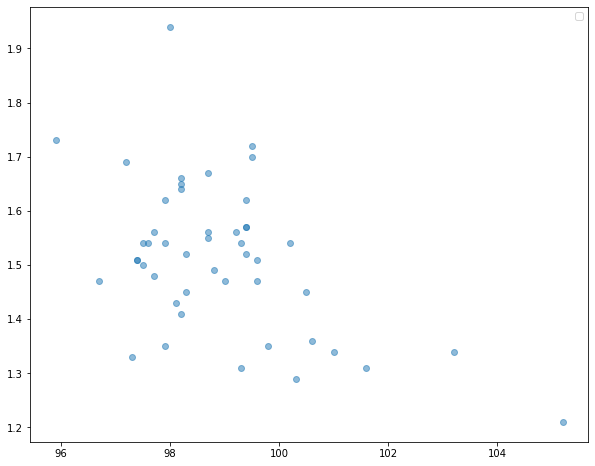

In [817]:
plt.figure(figsize=(10, 8))
plt.scatter(y=scatter[['fertility']], x=scatter['price'], alpha=0.5, )
plt.legend()

In [818]:
lst = []
for p in scatter['Prefecture']:
    if p in ['Tokyo', 'Kanagawa', 'Chiba', 'Saitama']:
        lst.append('Tokyo')
    elif p in ['Aichi','Gifu','Mie']:
        lst.append('Nagoya')
    elif p in ['Osaka', 'Hyogo', 'Kyoto', 'Nara']:
        lst.append('Osaka')
    else:
        lst.append('Regions')
lst = pd.Series(lst)
lst.name = 'Location'

scatter = pd.concat([scatter, lst], axis=1)

In [819]:
scatter

,code,Prefecture,price,fertility,Location
0,1,Hokkaido,100.3,1.29,Regions
1,2,Aomori,98.1,1.43,Regions
2,3,Iwate,99.0,1.47,Regions
3,4,Miyagi,99.3,1.31,Regions
4,5,Akita,97.9,1.35,Regions
5,6,Yamagata,100.5,1.45,Regions
6,7,Fukushima,99.4,1.57,Regions
7,8,Ibaraki,97.7,1.48,Regions
8,9,Tochigi,98.3,1.45,Regions
9,10,Gunma,96.7,1.47,Regions


In [820]:
scatter.to_csv('scatter.csv',index=False)

## Create data for pie chart (Foreigners)

In [24]:
foreigners = pd.read_csv('../week_03/data/foreigners_2020.csv', header=[1])
foreigners 

,時間軸（年次） コード,時間軸（年次）,男女 コード,男女,全国，都道府県，市区町村 コード,全国，都道府県，市区町村,/国籍,総数,外国人,日本人,日本人・外国人の別「不詳」
0,2020000000,2020年,0,総数,0,全国,NaN,"126,146,099","2,402,460","121,541,155","2,202,484"


In [25]:
foreigners = foreigners.iloc[:, 7:]
foreigners.columns = ['Total', 'Foreigners', 'Japanese', 'Uncertain']
foreigners = foreigners[['Japanese', 'Foreigners', 'Uncertain']]

In [26]:
foreigners = foreigners.replace(',','', regex=True)

([<matplotlib.patches.Wedge at 0x7fc1b0830dc0>,
 [Text(-0.12587540735151226, -1.092774167805998, 'Japanese'),
  Text(0.1855964452026542, 1.0842296618005516, 'Foreigners'),
  Text(0.06030655840110616, 1.0983456282126378, 'Uncertain')])

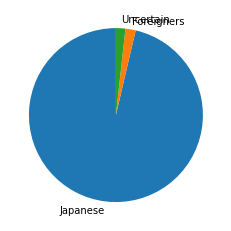

In [27]:
plt.pie(np.array(foreigners).flatten(), startangle = 90,labels=foreigners.columns)

In [28]:
foreigners

,Japanese,Foreigners,Uncertain
0,121541155,2402460,2202484


In [20]:
foreigners = foreigners.astype('int')
foreigners.iloc[0,1]/foreigners.iloc[0,:].sum()

0.019045059807992953

In [32]:
dct = dict()
for cat in ['Japanese', 'Foreigners', 'Uncertain']:
    dct[cat]= foreigners[cat][0]

In [33]:
import json
with open("foreigners.json", "w") as fp:
    json.dump(dct,fp) 

## Create data for line chart (projection discrepancy)

### Projection of population

In [23]:
proj = pd.read_csv('../week_03/data/projection_1997.csv')
proj = proj.iloc[2:,1:3]
proj = proj.dropna()
proj.columns = ['Year', '1997']
proj = proj.reset_index(drop=True)

In [24]:
for year in ['2002', '2006', '2012', '2017']:
    proj2 = pd.read_csv(f'../week_03/data/projection_{year}.csv')
    proj2 = proj2.iloc[1:,1:3]
    proj2 = proj2.dropna()
    proj2.columns = ['Year', f'{year}']
    proj2 = proj2.reset_index(drop=True)
    proj = proj.merge(proj2, left_on='Year', right_on='Year', how='outer')

In [25]:
proj['Year'] = proj['Year'].str.replace('(','').str.replace(')','')

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_13810/1493929108.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  proj['Year'] = proj['Year'].str.replace('(','').str.replace(')','')


In [26]:
pop = pd.read_csv('../week_03/data/population.csv', dtype='object')
pop = pop.iloc[1:, :2]
pop

,Unnamed: 0,総 人 口 Total population
1,1920,"55,963"
2,1921,"56,666"
3,1922,"57,390"
4,1923,"58,119"
5,1924,"58,876"
...,...,...
98,2017,"126,919"
99,2018,"126,749"
100,2019,"126,555"
101,2020,"126,146"


In [27]:
proj = proj.merge(pop, left_on='Year', right_on='Unnamed: 0', how='left')
proj = proj.drop('Unnamed: 0', axis=1)
proj.columns = ['Year', '1997','2002','2006','2012','2017','Actual']
proj = proj.replace(',','', regex=True)
proj = proj.fillna(0)

In [28]:
proj

,Year,1997,2002,2006,2012,2017,Actual
0,1995,125570,0,0,0,0,125570
1,1996,125869,0,0,0,0,125859
2,1997,126156,0,0,0,0,126157
3,1998,126420,0,0,0,0,126472
4,1999,126665,0,0,0,0,126667
...,...,...,...,...,...,...,...
66,2061,0,0,0,0,91897,0
67,2062,0,0,0,0,90949,0
68,2063,0,0,0,0,89994,0
69,2064,0,0,0,0,89036,0


In [29]:
for year in ['Year','1997','2002','2006','2012','2017','Actual']:
    proj[f'{year}'] = proj[f'{year}'].astype(int)

In [30]:
proj=proj[proj['Year']<=2045]

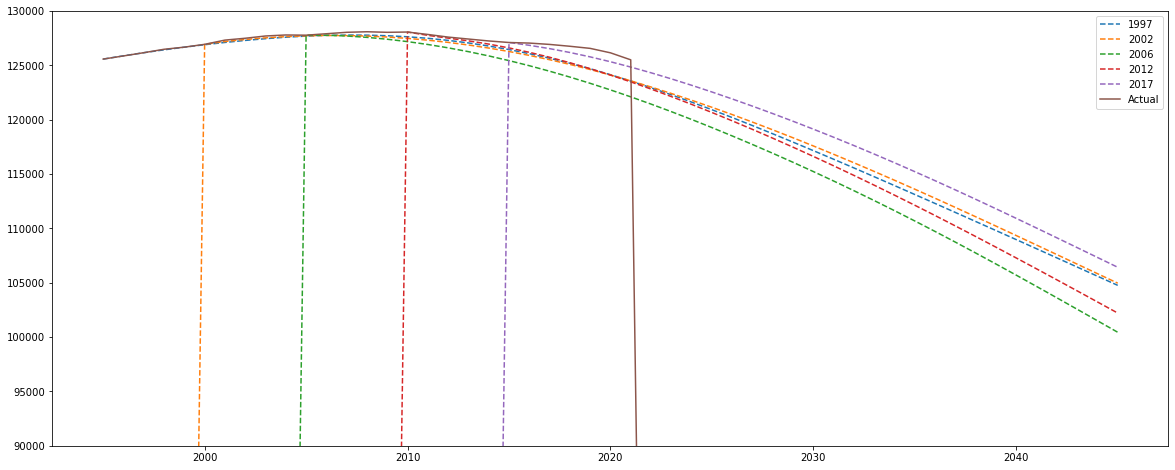

In [31]:
plt.figure(figsize=(20, 8))
for year in ['1997','2002','2006','2012','2017']:
    plt.plot(proj[f'Year'], proj[f'{year}'], label=f"{year}", linestyle='dashed')
plt.plot(proj[f'Year'], proj['Actual'], label='Actual')
plt.ylim([90000, 130000])
plt.legend()
plt.show()

In [41]:
proj = pd.melt(proj.reset_index(), id_vars='Year', value_vars=['1997', '2002', '2006', '2012', '2017', 'Actual'])

In [42]:
proj.to_csv('prediction_line.csv',index=False)

### Assumption of fertility rate

In [107]:
proj_f = pd.read_csv('../week_03/data/projection_f_1997.csv')
proj_f = proj_f.iloc[2:,1:3]
proj_f = proj_f.dropna()
proj_f.columns = ['Year', '1997']
proj_f = proj_f.reset_index(drop=True)

In [108]:
for year in ['2002', '2006', '2012', '2017']:
    proj_f_2 = pd.read_csv(f'../week_03/data/projection_f_{year}.csv')
    proj_f_2 = proj_f_2.iloc[1:,1:3]
    proj_f_2 = proj_f_2.dropna()
    proj_f_2.columns = ['Year', f'{year}']
    proj_f_2 = proj_f_2.reset_index(drop=True)
    proj_f = proj_f.merge(proj_f_2, left_on='Year', right_on='Year', how='outer')

In [109]:
proj_f

,Year,1997,2002,2006,2012,2017
0,(1996),1.42151,NaN,NaN,NaN,NaN
1,(1997),1.39656,NaN,NaN,NaN,NaN
2,(1998),1.38530,NaN,NaN,NaN,NaN
3,(1999),1.38001,NaN,NaN,NaN,NaN
4,(2000),1.37987,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
65,(2061),NaN,NaN,NaN,NaN,1.4425
66,(2062),NaN,NaN,NaN,NaN,1.4427
67,(2063),NaN,NaN,NaN,NaN,1.4429
68,(2064),NaN,NaN,NaN,NaN,1.4431


In [110]:
proj_f['Year'] = proj_f['Year'].str.replace('(','').str.replace(')','')

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_13810/2584345.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  proj_f['Year'] = proj_f['Year'].str.replace('(','').str.replace(')','')


In [111]:
all_japan_f= pd.read_csv('../week_03/data/fertility_rate_all.csv')

In [112]:
all_japan_f = all_japan_f.iloc[7:, [0,2]]
all_japan_f = all_japan_f.dropna()
all_japan_f = all_japan_f.reset_index()

In [113]:
all_japan_f.iloc[:,0] = pd.Series([i for i in range(1947, 2022)])

In [114]:
all_japan_f = all_japan_f.iloc[:, [0,2]]

In [115]:
all_japan_f.dtypes

index          int64
Unnamed: 2    object
dtype: object

In [116]:
proj_f['Year'] = proj_f['Year'].astype(int)
proj_f = proj_f.merge(all_japan_f, left_on='Year', right_on='index', how='left')

In [117]:
proj_f.drop('index', axis=1, inplace=True)
proj_f.columns = ['Year', '1997','2002','2006','2012','2017','Actual']
proj_f = proj_f.replace(',','', regex=True)
proj_f = proj_f.fillna(0)

In [118]:
for year in ['1997','2002','2006','2012','2017','Actual']:
    proj_f[f'{year}'] = proj_f[f'{year}'].astype(float)
proj_f['Year'] = proj_f['Year'].astype(int)

In [119]:
proj_f

,Year,1997,2002,2006,2012,2017,Actual
0,1996,1.42151,0.0,0.0,0.0,0.0000,1.43
1,1997,1.39656,0.0,0.0,0.0,0.0000,1.39
2,1998,1.38530,0.0,0.0,0.0,0.0000,1.38
3,1999,1.38001,0.0,0.0,0.0,0.0000,1.34
4,2000,1.37987,0.0,0.0,0.0,0.0000,1.36
...,...,...,...,...,...,...,...
65,2061,0.00000,0.0,0.0,0.0,1.4425,0.00
66,2062,0.00000,0.0,0.0,0.0,1.4427,0.00
67,2063,0.00000,0.0,0.0,0.0,1.4429,0.00
68,2064,0.00000,0.0,0.0,0.0,1.4431,0.00


In [120]:
proj_f = proj_f[proj_f['Year'] <=2045]

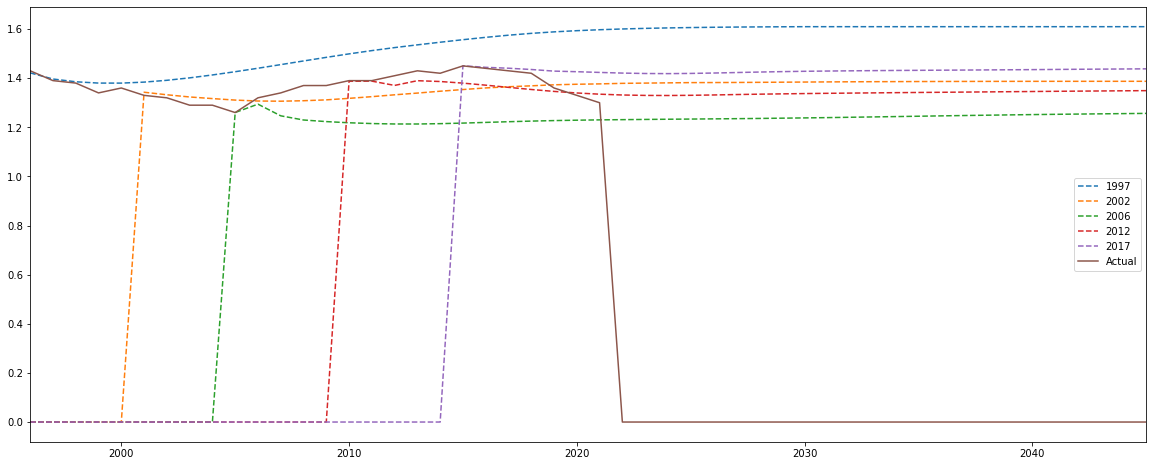

In [121]:
plt.figure(figsize=(20, 8))
for year in ['1997','2002','2006','2012','2017']:
    plt.plot(proj_f[f'Year'], proj_f[f'{year}'], label=f"{year}", linestyle='dashed')
plt.plot(proj_f[f'Year'], proj_f['Actual'], label='Actual')
plt.legend()
plt.xlim([1996,2045])
plt.show()

In [122]:
proj_f = pd.melt(proj_f.reset_index(), id_vars='Year', value_vars=['1997', '2002', '2006', '2012', '2017', 'Actual'])

In [123]:
proj_f.to_csv('prediction_f_line.csv', index=False)

## Create data for stacked area chart (time difference between male and female)

In [ ]:
time = pd.read_csv('../week_03/data/time_2021.csv')

In [ ]:
time

,共働きか否か,末子の年齢,男女,行動の種類,01_0:00 - 0:15,02_0:15 - 0:30,03_0:30 - 0:45,04_0:45 - 1:00,05_1:00 - 1:15,06_1:15 - 1:30,...,87_21:30 - 21:45,88_21:45 - 22:00,89_22:00 - 22:15,90_22:15 - 22:30,91_22:30 - 22:45,92_22:45 - 23:00,93_23:00 - 23:15,94_23:15 - 23:30,95_23:30 - 23:45,96_23:45 - 24:00
0,1_うち夫が有業で妻も有業(共働き),0_総数,1_夫,01_睡眠,86.84,87.34,88.76,89.15,92.44,92.81,...,16.53,17.78,31.67,33.57,40.88,42.91,59.55,61.96,69.99,72.66
1,1_うち夫が有業で妻も有業(共働き),0_総数,1_夫,02_身の回りの用事,0.99,1.21,1.20,1.23,0.78,0.75,...,9.98,9.62,7.63,7.55,7.06,6.54,5.41,4.57,3.74,3.21
2,1_うち夫が有業で妻も有業(共働き),0_総数,1_夫,03_食事,0.47,0.38,0.28,0.27,0.20,0.15,...,5.42,4.91,4.27,3.95,3.03,2.52,1.28,1.21,0.57,0.48
3,1_うち夫が有業で妻も有業(共働き),0_総数,1_夫,04_通勤・通学,0.47,0.27,0.25,0.21,0.17,0.15,...,3.07,2.95,2.65,2.14,1.30,1.06,1.18,1.23,1.22,1.06
4,1_うち夫が有業で妻も有業(共働き),0_総数,1_夫,05_仕事,2.90,2.84,2.63,2.65,2.69,2.59,...,8.73,8.29,6.19,6.06,5.68,5.66,4.65,4.56,4.06,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2_うち夫が有業で妻が無業,3_18歳以上,2_妻,16_スポーツ,-,-,-,-,-,-,...,0.37,0.27,0.36,0.36,0.04,0.04,-,-,-,-
316,2_うち夫が有業で妻が無業,3_18歳以上,2_妻,17_ボランティア活動・社会参加活動,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
317,2_うち夫が有業で妻が無業,3_18歳以上,2_妻,18_交際・付き合い,-,-,-,-,-,-,...,0.05,0.04,0.02,0.02,0.09,0.09,0.02,0.02,0.02,0.02
318,2_うち夫が有業で妻が無業,3_18歳以上,2_妻,19_受診・療養,-,-,-,-,-,-,...,0.10,0.10,0.08,0.08,0.08,0.16,0.16,0.16,0.14,0.07


In [ ]:
np.unique(time['行動の種類'])

array(['01_睡眠', '02_身の回りの用事', '03_食事', '04_通勤・通学', '05_仕事', '06_学業',
       '07_家事', '08_介護・看護', '09_育児', '10_買い物', '11_移動(通勤・通学を除く)',
       '12_テレビ・ラジオ・新聞・雑誌', '13_休養・くつろぎ', '14_学習・自己啓発・訓練(学業以外)',
       '15_趣味・娯楽', '16_スポーツ', '17_ボランティア活動・社会参加活動', '18_交際・付き合い',
       '19_受診・療養', '20_その他'], dtype=object)

In [ ]:
actions = {'01_睡眠':'Sleep', '02_身の回りの用事':'Washing', '03_食事':'Eating', 
          '04_通勤・通学':'Traveling', '05_仕事':'Work', '06_学業':'Others',
          '07_家事':'Household_activities', '08_介護・看護':'Others', '09_育児':'Child_care', 
          '10_買い物':'Shopping', '11_移動(通勤・通学を除く)':'Traveling',
          '12_テレビ・ラジオ・新聞・雑誌':'TV', '13_休養・くつろぎ':'Relaxing', 
          '14_学習・自己啓発・訓練(学業以外)':'Others', '15_趣味・娯楽':'Hobby', 
          '16_スポーツ':'Hobby', '17_ボランティア活動・社会参加活動':'Others', 
          '18_交際・付き合い':'Hobby','19_受診・療養':'Others', '20_その他':'Others'}

In [ ]:
np.unique(time['末子の年齢'])

array(['0_総数', '1_６歳未満', '2_６～17歳', '3_18歳以上'], dtype=object)

In [ ]:
gender = {'1_夫':'husband', '2_妻':'wife'}

In [ ]:
status = {'1_うち夫が有業で妻も有業(共働き)':'Both working','2_うち夫が有業で妻が無業':'Only woman is unemployed'}

In [ ]:
child = {'0_総数':'Total', '1_６歳未満':'-6', '2_６～17歳':'6-17','3_18歳以上':'18-'}

In [ ]:
time = time.replace({'男女':gender, '共働きか否か':status, '末子の年齢':child, '行動の種類':actions})

In [ ]:
time

,共働きか否か,末子の年齢,男女,行動の種類,01_0:00 - 0:15,02_0:15 - 0:30,03_0:30 - 0:45,04_0:45 - 1:00,05_1:00 - 1:15,06_1:15 - 1:30,...,87_21:30 - 21:45,88_21:45 - 22:00,89_22:00 - 22:15,90_22:15 - 22:30,91_22:30 - 22:45,92_22:45 - 23:00,93_23:00 - 23:15,94_23:15 - 23:30,95_23:30 - 23:45,96_23:45 - 24:00
0,Both working,Total,husband,Sleep,86.84,87.34,88.76,89.15,92.44,92.81,...,16.53,17.78,31.67,33.57,40.88,42.91,59.55,61.96,69.99,72.66
1,Both working,Total,husband,Washing,0.99,1.21,1.20,1.23,0.78,0.75,...,9.98,9.62,7.63,7.55,7.06,6.54,5.41,4.57,3.74,3.21
2,Both working,Total,husband,Eating,0.47,0.38,0.28,0.27,0.20,0.15,...,5.42,4.91,4.27,3.95,3.03,2.52,1.28,1.21,0.57,0.48
3,Both working,Total,husband,Traveling,0.47,0.27,0.25,0.21,0.17,0.15,...,3.07,2.95,2.65,2.14,1.30,1.06,1.18,1.23,1.22,1.06
4,Both working,Total,husband,Work,2.90,2.84,2.63,2.65,2.69,2.59,...,8.73,8.29,6.19,6.06,5.68,5.66,4.65,4.56,4.06,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Only woman is unemployed,18-,wife,Hobby,-,-,-,-,-,-,...,0.37,0.27,0.36,0.36,0.04,0.04,-,-,-,-
316,Only woman is unemployed,18-,wife,Others,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
317,Only woman is unemployed,18-,wife,Hobby,-,-,-,-,-,-,...,0.05,0.04,0.02,0.02,0.09,0.09,0.02,0.02,0.02,0.02
318,Only woman is unemployed,18-,wife,Others,-,-,-,-,-,-,...,0.10,0.10,0.08,0.08,0.08,0.16,0.16,0.16,0.14,0.07


In [ ]:
time = time.replace('-',0)

In [ ]:
time.iloc[:,4:]=time.iloc[:,4:].astype(float)

In [ ]:
time2 = time.groupby(['男女','共働きか否か','末子の年齢', '行動の種類']).sum().reset_index()

In [ ]:
time2 = pd.pivot_table(time2, values=[c for c in time.columns if '_' in c], index=['共働きか否か', '末子の年齢', '男女'], columns=['行動の種類']).stack(0)

In [ ]:
time2 = time2.reset_index()

In [ ]:
time2['level_3']=time2['level_3'].str.slice(3)

In [ ]:
time2['level_3']=time2['level_3'].map(lambda v: v.split(' -')[0])

In [ ]:
time2.rename(columns={'共働きか否か':'Work Status', '末子の年齢':'Last child age', '男女':'Gender', 'level_3':'Time'},inplace=True)

In [ ]:
time2.columns

Index(['Work Status', 'Last child age', 'Gender', 'Time', 'Child_care',
       'Eating', 'Hobby', 'Household_activities', 'Others', 'Relaxing',
       'Shopping', 'Sleep', 'TV', 'Traveling', 'Washing', 'Work'],
      dtype='object', name='行動の種類')

In [ ]:
time2 = time2[time2['Last child age']!='Total']

In [ ]:
time2.sum(axis=0)[4:].sort_values()

行動の種類
Shopping                 1718.91
Others                   2159.85
Hobby                    2469.49
Child_care               4539.94
Traveling                4780.11
TV                       5590.74
Washing                  6025.09
Eating                   7164.79
Relaxing                 7689.81
Household_activities    10668.64
Work                    27057.89
Sleep                   35334.74
dtype: object

In [ ]:
all = dict()
for work in ['Both working','Only woman is unemployed']:
    sub = dict()
    for child in ['-6', '6-17', '18-']:
        subsub = dict()
        for gender in ['husband', 'wife']:
            df = time2[time2['Work Status'] == work][time2['Last child age'] == child][time2['Gender']==gender].iloc[:,3:]
            subsub[gender] = df.to_dict(orient='records')
        sub[child] = subsub
    all[work] = sub

/var/folders/f4/d26fc2lx7y5d0rs_6sbh_b2h0000gn/T/ipykernel_23323/2409228403.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = time2[time2['Work Status'] == work][time2['Last child age'] == child][time2['Gender']==gender].iloc[:,3:]


In [ ]:
all

{'Both working': {'-6': {'husband': [{'Time': '0:00',
     'Child_care': 0.38,
     'Eating': 0.51,
     'Hobby': 2.75,
     'Household_activities': 0.42,
     'Others': 0.48,
     'Relaxing': 4.2,
     'Shopping': 0.0,
     'Sleep': 84.21,
     'TV': 1.8,
     'Traveling': 0.14,
     'Washing': 1.7,
     'Work': 3.41},
    {'Time': '0:15',
     'Child_care': 0.37,
     'Eating': 0.51,
     'Hobby': 2.7300000000000004,
     'Household_activities': 0.36,
     'Others': 0.48,
     'Relaxing': 4.14,
     'Shopping': 0.0,
     'Sleep': 84.48,
     'TV': 1.49,
     'Traveling': 0.22,
     'Washing': 1.96,
     'Work': 3.26},
    {'Time': '0:30',
     'Child_care': 0.37,
     'Eating': 0.36,
     'Hobby': 2.73,
     'Household_activities': 0.28,
     'Others': 0.45,
     'Relaxing': 3.35,
     'Shopping': 0.0,
     'Sleep': 86.12,
     'TV': 1.65,
     'Traveling': 0.32,
     'Washing': 1.4,
     'Work': 2.98},
    {'Time': '0:45',
     'Child_care': 0.38,
     'Eating': 0.32,
     'Hobby': 

In [ ]:
import json
with open("time.json", "w") as fp:
    json.dump(all,fp) 

In [ ]:
list(time2['Time'][:96])

['0:00',
 '0:15',
 '0:30',
 '0:45',
 '1:00',
 '1:15',
 '1:30',
 '1:45',
 '2:00',
 '2:15',
 '2:30',
 '2:45',
 '3:00',
 '3:15',
 '3:30',
 '3:45',
 '4:00',
 '4:15',
 '4:30',
 '4:45',
 '5:00',
 '5:15',
 '5:30',
 '5:45',
 '6:00',
 '6:15',
 '6:30',
 '6:45',
 '7:00',
 '7:15',
 '7:30',
 '7:45',
 '8:00',
 '8:15',
 '8:30',
 '8:45',
 '9:00',
 '9:15',
 '9:30',
 '9:45',
 '10:00',
 '10:15',
 '10:30',
 '10:45',
 '11:00',
 '11:15',
 '11:30',
 '11:45',
 '12:00',
 '12:15',
 '12:30',
 '12:45',
 '13:00',
 '13:15',
 '13:30',
 '13:45',
 '14:00',
 '14:15',
 '14:30',
 '14:45',
 '15:00',
 '15:15',
 '15:30',
 '15:45',
 '16:00',
 '16:15',
 '16:30',
 '16:45',
 '17:00',
 '17:15',
 '17:30',
 '17:45',
 '18:00',
 '18:15',
 '18:30',
 '18:45',
 '19:00',
 '19:15',
 '19:30',
 '19:45',
 '20:00',
 '20:15',
 '20:30',
 '20:45',
 '21:00',
 '21:15',
 '21:30',
 '21:45',
 '22:00',
 '22:15',
 '22:30',
 '22:45',
 '23:00',
 '23:15',
 '23:30',
 '23:45']